# Introduction to Statsmodels

Reference - [Official Documentation](http://www.statsmodels.org/stable/index.html)

A Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
import statsmodels.api as sm

In [10]:
df = sm.datasets.macrodata.load_pandas().data

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [12]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

We can use the statsmodel itself to set the date as the index with additional manipulations.

In [17]:
df.index = sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


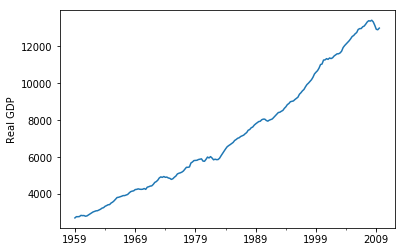

In [24]:
df['realgdp'].plot()
plt.ylabel('Real GDP');

## Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

In [28]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [29]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


In [30]:
type(gdp_cycle)

pandas.core.series.Series

In [31]:
df['trend'] = gdp_trend

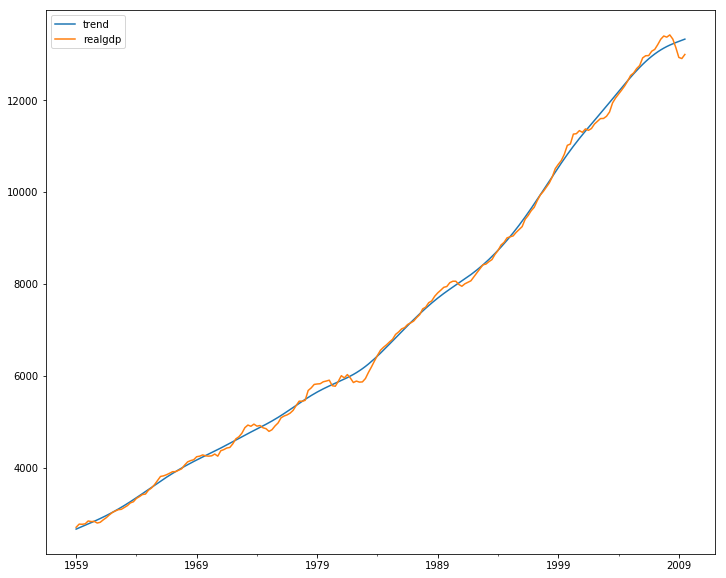

In [38]:
df[['trend','realgdp']].plot(figsize = (12,10))

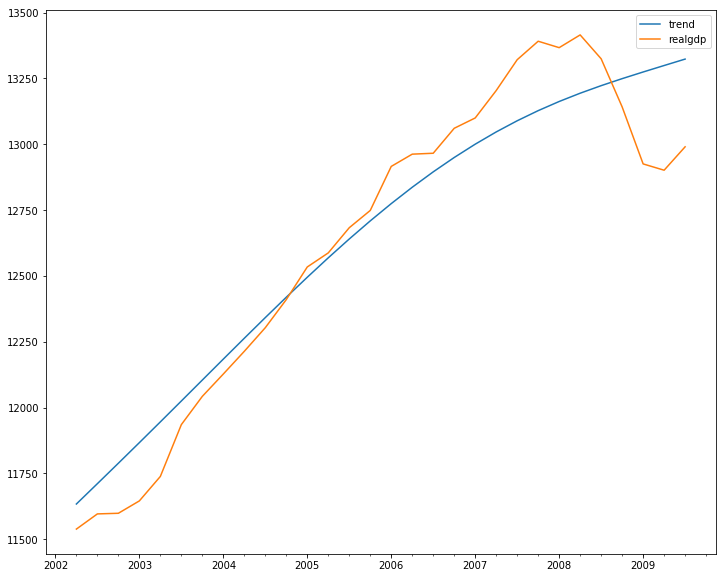

In [40]:
df[['trend','realgdp']]['2002-06-30':].plot(figsize = (12,10))

### de nada!